<a href="https://colab.research.google.com/github/RafaelLVaz/Checkpoint-02-Casos-de-Uso-de-ML---Energia-E-lica-e-Energia-Solar/blob/main/CP_SERS_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/SolarPrediction.csv')
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [ ]:
df.dropna()
limiar = df['Radiation'].median()

df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'])
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'])

df['TimeSunRise_seconds'] = df['TimeSunRise'].dt.hour * 3600 + df['TimeSunRise'].dt.minute * 60 + df['TimeSunRise'].dt.second
df['TimeSunSet_seconds'] = df['TimeSunSet'].dt.hour * 3600 + df['TimeSunSet'].dt.minute * 60 + df['TimeSunSet'].dt.second

df = df.drop(columns=['TimeSunRise', 'TimeSunSet'])

# Verifique o resultado
display(df.head())
print(limiar)

/tmp/ipython-input-1093359296.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'])
/tmp/ipython-input-1093359296.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'])


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise_seconds,TimeSunSet_seconds
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,22380,65580
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,22380,65580
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,22380,65580
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,22380,65580
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,22380,65580


2.66


In [ ]:
df['Radiation_Class'] = np.where(df['Radiation'] >= limiar, 'High Radiation', 'Low Radiation')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise_seconds,TimeSunSet_seconds,Radiation_Class
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,22380,65580,Low Radiation
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,22380,65580,Low Radiation
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,22380,65580,Low Radiation
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,22380,65580,Low Radiation
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,22380,65580,Low Radiation


In [ ]:
X = df.drop(['Radiation', 'Radiation_Class', 'Data', 'Time'], axis=1)
y = df['Radiation_Class']
display(X.head())
display(y.head())

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise_seconds,TimeSunSet_seconds
0,1475229326,48,30.46,59,177.39,5.62,22380,65580
1,1475229023,48,30.46,58,176.78,3.37,22380,65580
2,1475228726,48,30.46,57,158.75,3.37,22380,65580
3,1475228421,48,30.46,60,137.71,3.37,22380,65580
4,1475228124,48,30.46,62,104.95,5.62,22380,65580


,Radiation_Class
0,Low Radiation
1,Low Radiation
2,Low Radiation
3,Low Radiation
4,Low Radiation


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
# Instantiate the models
dt_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)
svm_model = SVC(random_state=0)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Instantiate the models
dt_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)
svm_model = SVC(random_state=0)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model.fit(X_train_scaled, y_train)


# Make predictions
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test_scaled)


# Evaluate the models
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("-" * 30)

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("-" * 30)

print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

Decision Tree Performance:
Accuracy: 0.9410564960228431
                precision    recall  f1-score   support

High Radiation       0.94      0.95      0.94      4903
 Low Radiation       0.95      0.94      0.94      4903

      accuracy                           0.94      9806
     macro avg       0.94      0.94      0.94      9806
  weighted avg       0.94      0.94      0.94      9806

------------------------------
Random Forest Performance:
Accuracy: 0.9626759127065062
                precision    recall  f1-score   support

High Radiation       0.97      0.96      0.96      4903
 Low Radiation       0.96      0.97      0.96      4903

      accuracy                           0.96      9806
     macro avg       0.96      0.96      0.96      9806
  weighted avg       0.96      0.96      0.96      9806

------------------------------
SVM Performance:
Accuracy: 0.8499898021619416
                precision    recall  f1-score   support

High Radiation       0.94      0.75      0.83

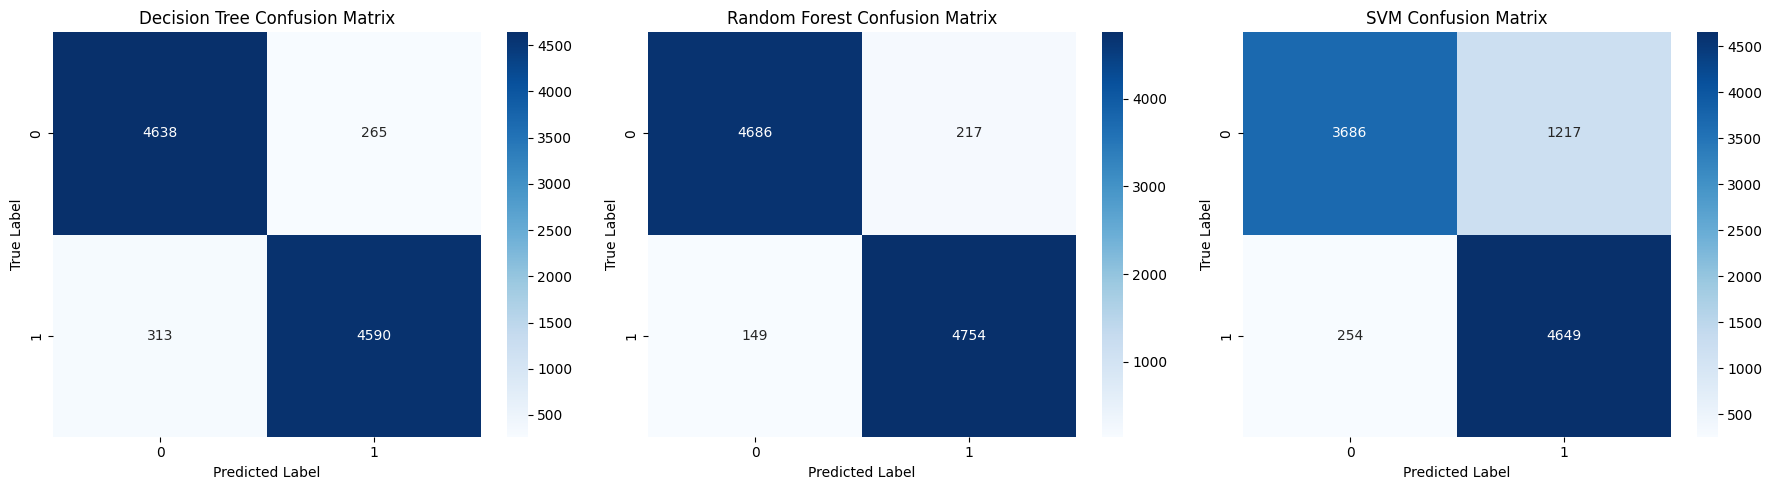

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("SVM Confusion Matrix")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()